# Experimental results for adaptive air caution

In [1]:
#import libraries
import numpy as np
import pandas as pd
from os import path, listdir
from scipy.signal import butter, lfilter, freqz
from IPython.display import Video
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# set file path
data_dir = path.join('data','scaledCushion_1-2', '31-05-2022')
data_dir_list = listdir(data_dir)
print('Data directory: {}'.format(data_dir))
print('Files in data data directory: {}\n'.format(data_dir_list))

crio_data_dir = path.join(data_dir, 'data_crio')
shimmer_data_dir = path.join(data_dir, 'data_shimmer')
movies_data_dir = path.join(data_dir, 'movies')

# get list of files
crio_dir_list = sorted(listdir(crio_data_dir))
shimmer_dir_list = sorted(listdir(shimmer_data_dir))
movies_dir_list = sorted(listdir(movies_data_dir))
file_names = pd.DataFrame()
file_names['data_crio'] = crio_dir_list
file_names['data_shimmer'] = shimmer_dir_list
file_names['data_movies'] = movies_dir_list
#file_names.sort_values(by = ['data_crio', 'data_shimmer', 'data_movies'] , inplace =True, ignore_index=True)
print('List of files:')
file_names

Data directory: data/scaledCushion_1-2/31-05-2022
Files in data data directory: ['data_crio', 'movies', 'data_shimmer']

List of files:


,data_crio,data_shimmer,data_movies
0,h1500_m10_vc_1.lvm,h1500_m10_vc_1.txt,h1500_m10_vc_1.mp4
1,h1500_m10_vc_2.lvm,h1500_m10_vc_2.txt,h1500_m10_vc_2.mp4
2,h1500_m10_vo_1.lvm,h1500_m10_vo_1.txt,h1500_m10_vo_1.mp4
3,h1500_m10_vo_2.lvm,h1500_m10_vo_2.txt,h1500_m10_vo_2.mp4
4,h1500_m5_vc_1.lvm,h1500_m5_vc_1.txt,h1500_m5_vc_1.mp4
5,h1500_m5_vc_2.lvm,h1500_m5_vc_2.txt,h1500_m5_vc_2.mp4
6,h1500_m5_vo_1.lvm,h1500_m5_vo_1.txt,h1500_m5_vo_1.mp4
7,h1500_m5_vo_2.lvm,h1500_m5_vo_2.txt,h1500_m5_vo_2.mp4
8,h2500_m10_vc_1.lvm,h2500_m10_vc_1.txt,h2500_m10_vc_1.mp4
9,h2500_m10_vc_2.lvm,h2500_m10_vc_2.txt,h2500_m10_vc_2.mp4


## Print file path and experimental data

In [3]:
# load data from c-rio
def load_crio_data(filename):
    crio_data = pd.read_csv(path.join(crio_data_dir, filename), sep='\t', header = None)
    print(np.shape(crio_data))
    crio_data.drop([0, 9], axis = 1, inplace=True)
    crio_data.columns = ['Top chamber pressure', 'Bottom chamber pressure','Air frame pressure',\
                         'Absolute pressure', 'Force 1', 'Force 2',\
                         'Force 3', 'Force 4']
    return crio_data

sample_crio_data = load_crio_data(file_names['data_crio'][0])
sample_crio_data.head()

(5000, 10)


,Top chamber pressure,Bottom chamber pressure,Air frame pressure,Absolute pressure,Force 1,Force 2,Force 3,Force 4
0,0.361044,-0.369590,163.415335,1006.847816,316.963867,60.443743,101.661236,232.480965
1,0.012146,-0.049425,162.676610,1007.791922,317.123154,60.443743,103.254611,252.186972
2,-0.213612,0.311788,163.251174,1007.094105,318.238159,63.445810,101.501899,298.167656
3,-0.065843,0.488289,164.810704,1005.862662,320.468170,62.813796,101.820574,317.873663
4,0.159914,0.164019,164.318220,1007.422489,317.601013,62.023778,100.864549,324.442332


In [4]:
# load data from shimmer
def load_shimmer_data(filename):
    shimmer_data = pd.read_csv(path.join(shimmer_data_dir, filename), sep='\t')
    return shimmer_data

sample_shimmer_data = load_shimmer_data(file_names['data_shimmer'][0])
sample_shimmer_data.head()

,Timestamp,PC Timestamp,Low Noise Accelerometer X,Low Noise Accelerometer Y,Low Noise Accelerometer Z,Int A12,Int A13,Int A14,Gyroscope X,Gyroscope Y,Gyroscope Z,Wide Range Accelerometer X,Wide Range Accelerometer Y,Wide Range Accelerometer Z
0,224745.026,NaN,-3.565,1.380,9.152,1504.762,1504.029,1510.623,-4.672,-0.550,3.466,-6.278,-0.459,8.038
1,224746.002,NaN,-3.576,1.380,9.141,1504.029,1504.762,1510.623,-4.672,-0.473,3.771,-6.124,-0.459,8.115
2,224746.979,NaN,-3.565,1.391,9.141,1505.495,1504.029,1509.890,-4.672,-0.473,3.649,-6.278,-0.383,7.962
3,224747.955,NaN,-3.576,1.402,9.141,1504.762,1504.029,1509.158,-4.473,-0.489,3.359,-6.354,-0.459,8.115
4,224748.932,NaN,-3.576,1.402,9.141,1504.762,1503.297,1510.623,-4.275,-0.473,3.603,-6.354,-0.536,8.115


## Design of digital lowpass filter

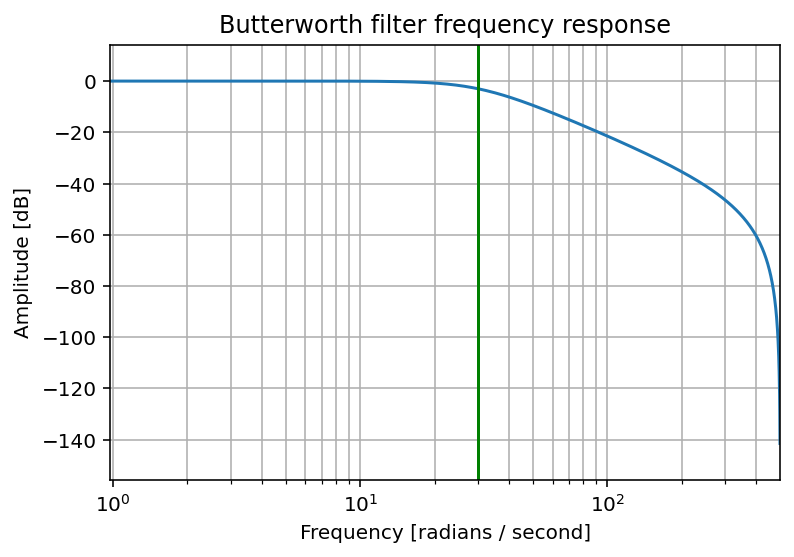

In [5]:
def butter_lowpass(cutoff, fs, order):
    # 'https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy.signal.butter'
    return butter(order, cutoff, fs=fs, btype='low', analog=False, output='ba')

def butter_lowpass_filter(input_sig, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    # 'https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html?highlight=lfilter#scipy.signal.lfilter'
    return lfilter(b, a, input_sig)
    
# filter parameters
order = 2 # filter order
fs = 1e3 # sample rate Hz
cutoff = 30 # cutoff frequency Hz

b, a = butter_lowpass(cutoff, fs, order)
w, h = freqz(b, a, fs=fs)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(cutoff, color='green') # cutoff frequency
plt.show()

## Filtered data

In [28]:
# new dataframe for filtered data
def filter_data(filename):
    
    # load data from crio and shimmer
    crio_data = load_crio_data(filename+'.lvm')
    shimmer_data = load_shimmer_data(filename+'.txt')
    
    # create new dataframe
    column_names = ['Top chamber pressure',
                    'Bottom chamber pressure',
                    'Air frame pressure',
                    'Absolute pressure',
                    'Force 1', 'Force 2',
                    'Force 3', 'Force 4',
                    'ACCL X', 'ACCL Y', 'ACCL Z']

    filtered_data = pd.DataFrame(columns = column_names)
    filtered_data.head()

    # adjust filter parameters
    fs = 1e3 # sample rate Hz
    order = 2 # filter order
    cutoff = [15, 15, 15, 15,
              60, 60, 60, 20,
              60, 60, 60]

    # get number of columns in crio data file
    crio_data_col = np.shape(crio_data)[1]
    
    # parse crio data
    for i in range(crio_data_col):
        filtered_sig = butter_lowpass_filter(crio_data.iloc[:, i], 
                                             cutoff[i], fs, order)
        filtered_data[column_names[i]] = filtered_sig
    
    # parse shimmer data
    for i in range(crio_data_col, crio_data_col + 3):
        filtered_sig = butter_lowpass_filter(shimmer_data.iloc[:, i+3], 
                                             cutoff[i], fs, order)
        filtered_data[column_names[i]] = pd.Series(filtered_sig)
    
    return filtered_data

sample_f_data = filter_data('h3500_m10_vc_1')
sample_f_data.head(50)

(5000, 10)


,Top chamber pressure,Bottom chamber pressure,Air frame pressure,Absolute pressure,Force 1,Force 2,Force 3,Force 4,ACCL X,ACCL Y,ACCL Z
0,-0.002477,0.000546,0.338801,2.095754,8.866041,1.679547,2.943236,1.008499,-0.164233,-0.006408,0.234607
1,-0.008793,0.001505,1.651983,10.200663,39.648728,7.551994,13.136882,4.863685,-0.735023,-0.028678,1.052125
2,-0.014274,0.000632,4.153513,25.593259,88.659366,16.932472,29.335492,11.911977,-1.642908,-0.066301,2.357413
3,-0.016222,-0.002915,7.674798,47.236215,142.919958,27.295717,47.200106,21.245896,-2.645323,-0.110860,3.801377
4,-0.017118,-0.006552,12.052964,74.171594,194.303855,37.151327,64.016201,32.310503,-3.591510,-0.150261,5.163675
5,-0.019008,-0.007188,17.145501,105.511056,238.246563,45.738354,78.391760,45.091935,-4.394991,-0.175837,6.321964
6,-0.021376,-0.003937,22.822592,140.437817,272.849517,52.645903,89.786191,59.672660,-5.020914,-0.188303,7.231439
7,-0.022257,0.000562,28.961999,178.215612,298.132418,57.705522,98.138960,75.596073,-5.481398,-0.193831,7.902054
8,-0.020307,0.002444,35.454254,218.177181,315.158758,60.997864,103.775694,91.889510,-5.806253,-0.198961,8.357744
9,-0.016110,0.001132,42.198906,259.717877,325.432887,62.837640,107.234572,107.733313,-6.011042,-0.205430,8.632247


## Plot raw data and filtered data

(5000, 10)
(5000, 10)


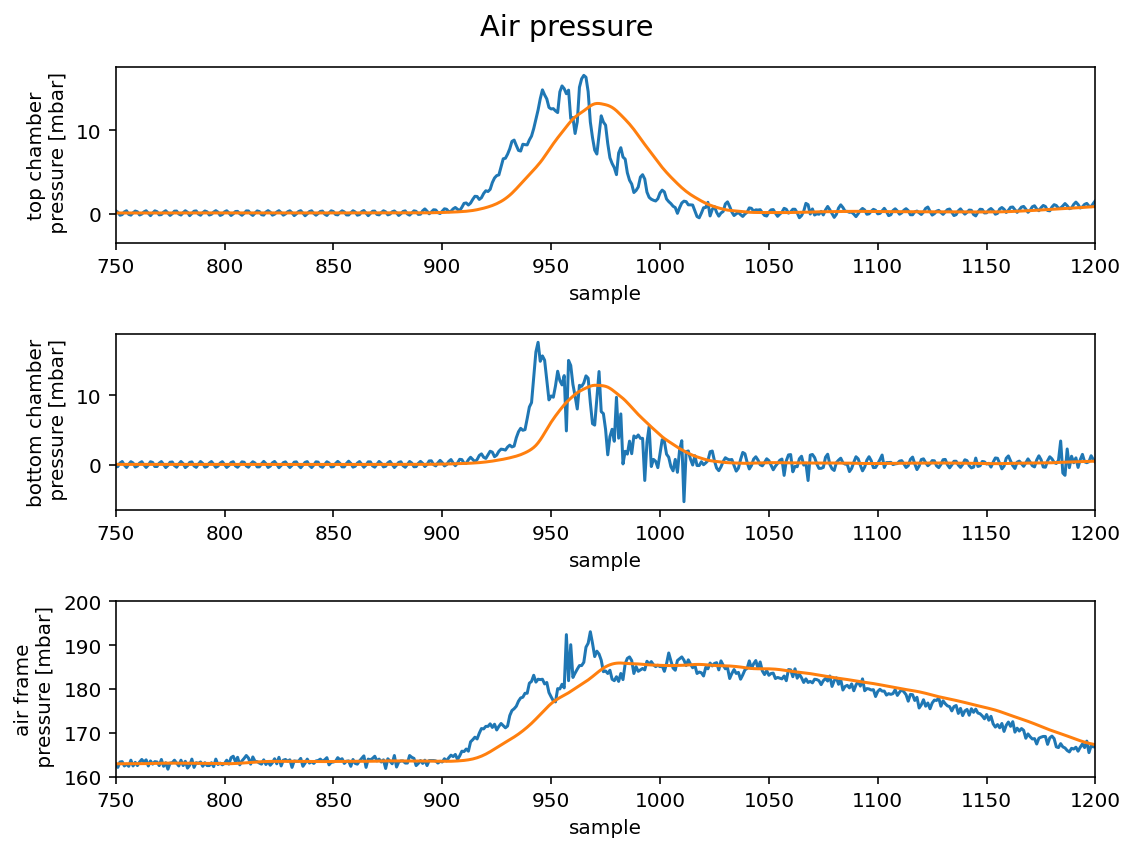

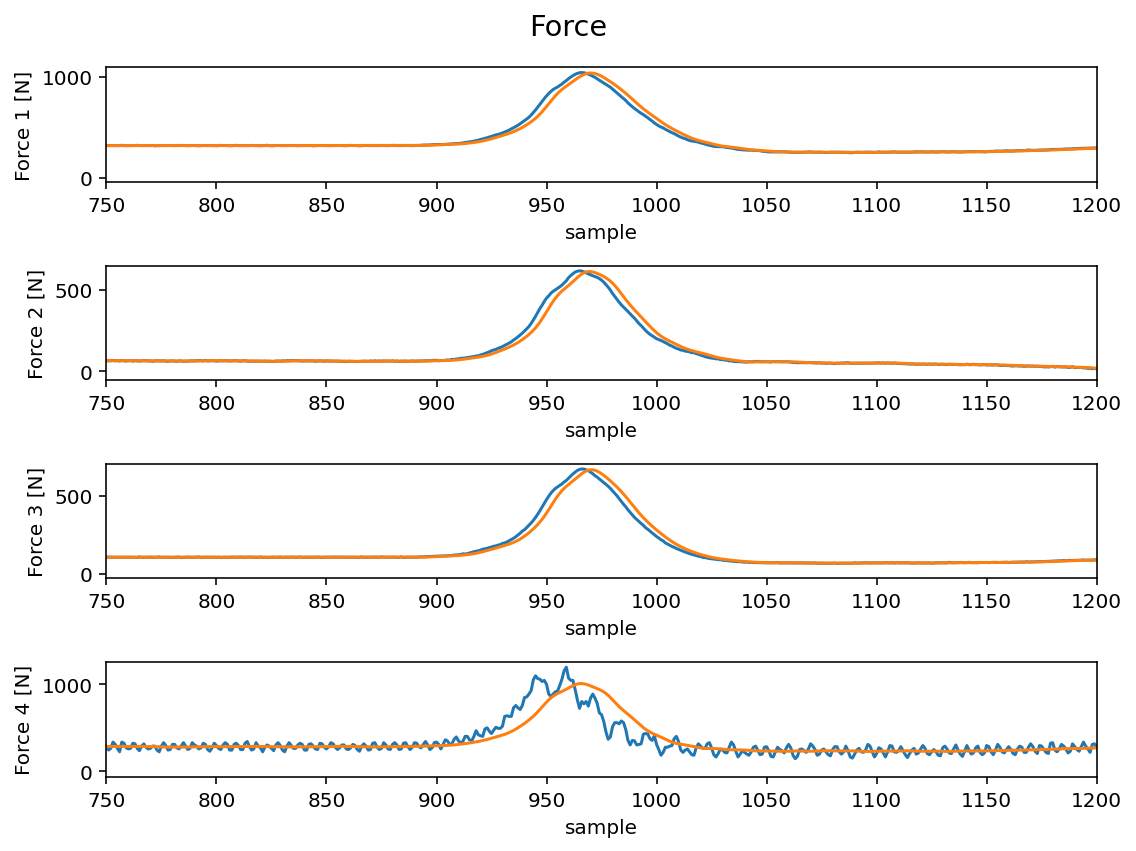

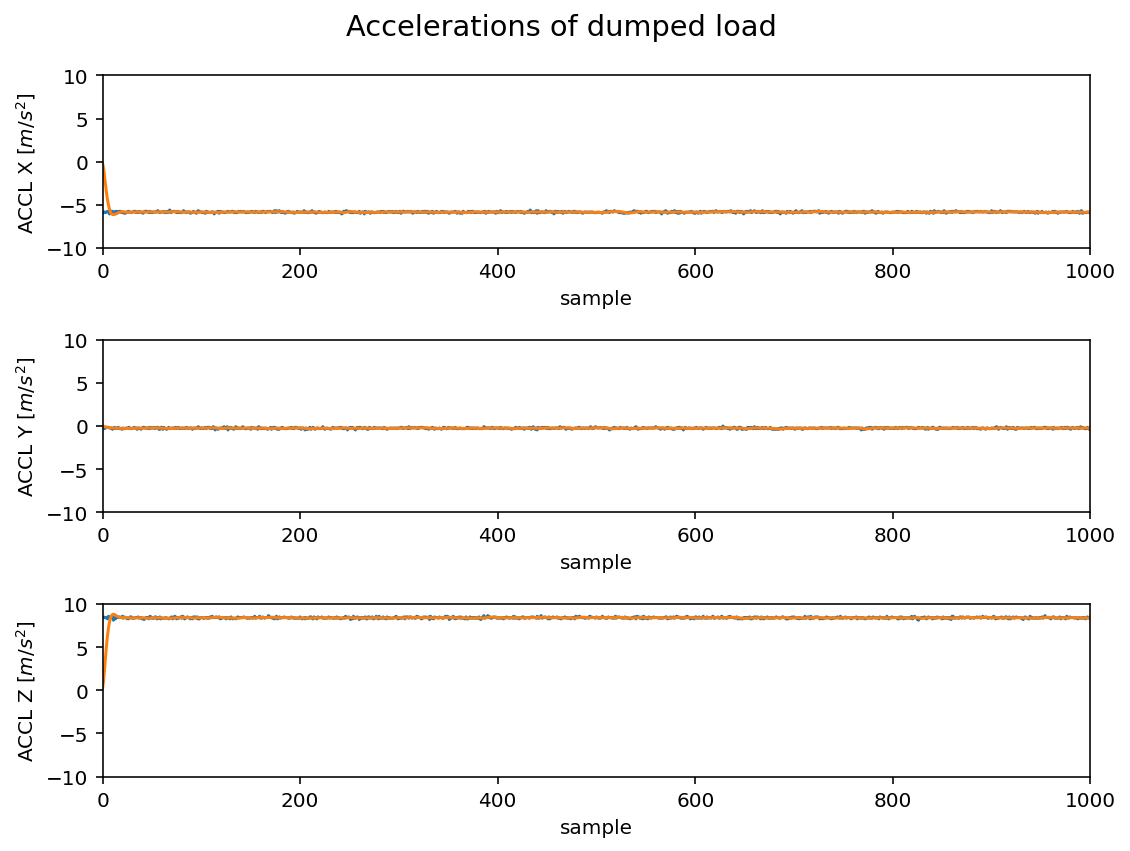

In [29]:
def plot_raw_data(filename):
    # load data
    crio_data = load_crio_data(filename+'.lvm')
    shimmer_data = load_shimmer_data(filename+'.txt')
    filtered_data = filter_data(filename)
    
    # plot pressure
    fig1, axs1 = plt.subplots(3, 1, figsize=(8,6))
    axs1[0].plot(crio_data['Top chamber pressure'])
    axs1[0].plot(filtered_data['Top chamber pressure'])
    axs1[1].plot(crio_data['Bottom chamber pressure'])
    axs1[1].plot(filtered_data['Bottom chamber pressure'])
    axs1[2].plot(crio_data['Air frame pressure'])
    axs1[2].plot(filtered_data['Air frame pressure'])
    for i in range(3):
        axs1[i].set_xlim(750, 1200)
        axs1[i].set_xlabel('sample')
    axs1[2].set_ylim(160, 200)
    axs1[0].set_ylabel('top chamber\n pressure [mbar]')
    axs1[1].set_ylabel('bottom chamber\n pressure [mbar]')
    axs1[2].set_ylabel('air frame\n pressure [mbar]')
    fig1.suptitle('Air pressure', fontsize='x-large')
    fig1.tight_layout()
    plt.show()
    
    # plot forces
    fig2, axs2 = plt.subplots(4, 1, figsize=(8,6))
    for i in range(4):
        axs2[i].plot(crio_data['Force {}'.format(i+1)])
        axs2[i].plot(filtered_data['Force {}'.format(i+1)])
        axs2[i].set_xlim(750, 1200)
        axs2[i].set_xlabel('sample')
        axs2[i].set_ylabel('Force {} [N]'.format(i+1))
    fig2.suptitle('Force', fontsize='x-large')
    fig2.tight_layout()
    plt.show()
    
    # plot acceleration
    fig3, axs3 = plt.subplots(3, 1, figsize=(8,6))
    axis = ['X', 'Y', 'Z']
    for i in range(3):
        axs3[i].plot(shimmer_data['Wide Range Accelerometer {}'.format(axis[i])])
        axs3[i].plot(filtered_data['ACCL {}'.format(axis[i])])
        axs3[i].set_xlim(0, 1000)
        axs3[i].set_ylim(-10, 10)
        axs3[i].set_xlabel('sample')    
        axs3[i].set_ylabel('ACCL {} '.format(axis[i]) + r'$[m/s^2]$')
    fig3.suptitle('Accelerations of dumped load', fontsize='x-large')
    fig3.tight_layout()
    plt.show()
    
    pass

plot_raw_data('h3500_m10_vc_1')

In [30]:
data_range = 3000 # select number of samples to be processed

def sync_force(plate_reaction_force, wireless_accel_force, data_range = 2000):
    plate_peak_index = plate_reaction_force
    #wireless_accel_peak_index =  
    return synchronized_vect

# proces and plot pressures
def plot_data(crio_filename, shimmer_filename):
    
    crio_data = load_crio_data(crio_filename)
    shimmer_data = load_shimmer_data(shimmer_filename)
    
    fig, axes = plt.subplots(nrows=2, ncols=1)
    chamber_pressure = crio_data.iloc[:data_range, 0:2].rolling(30).mean()
    chamber_pressure.plot.line(title = 'Pressure', ylabel = 'pressure [mbar]',\
                                         ax=axes[0])
    air_frame_pressure = crio_data.iloc[:data_range, 2:3].rolling(30).mean()
    air_frame_pressure.plot.line(xlabel = 'time [ms]', ylabel = 'pressure [mbar]',\
                                         ax=axes[1])
    plt.show()
    
    # proces and plot forces 
    fig, axes = plt.subplots(nrows=2, ncols=1)
    impact_plate_reaction_force = crio_data.iloc[:data_range, 4:-2].sum(axis=1)
    force_offset = impact_plate_reaction_force.iloc[:500].mean()
    impact_plate_reaction_force = impact_plate_reaction_force.subtract(force_offset)
    impact_plate_reaction_force.plot.line(ylabel = 'impact plate\n reaction force [N]', ax=axes[0])
    shimmer_force = np.sqrt(np.sum(np.power(shimmer_data.iloc[:,-3:], 2), axis=1))
    shimmer_force = shimmer_force.rolling(30).mean()
    shimmer_force.plot.line(xlabel = 'time [ms]', ylabel = 'wireless accelerometer\n force [N]', ax=axes[1])
    plt.show()

(5000, 10)


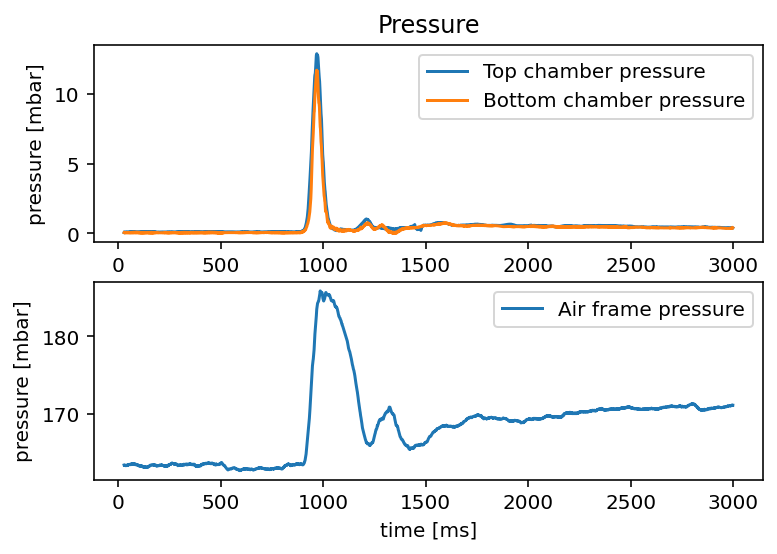

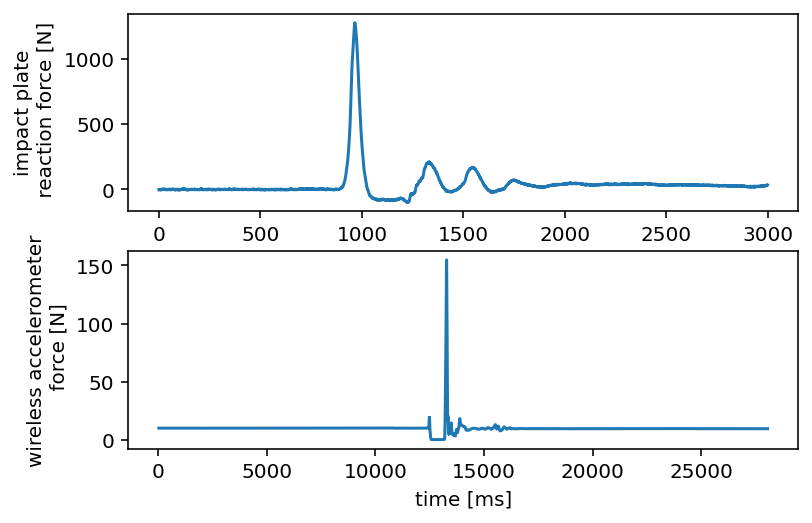

In [9]:
plot_data(file_names['data_crio'][16], file_names['data_shimmer'][16])

## Plot raw data 

In [10]:
# play movie
movie_title = file_names['data_movies'][16]
movie_path = path.join(data_dir, 'movies', movie_title)
Video(movie_path, width=600, height=480)

In [11]:
# 1. ta sama wysokość 
# 1. różne masy
# 1. otwarty zamknięty